In [15]:
import platform
import tensorflow as tf
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet169
import os
import shutil

data_dir = '/kaggle/input/brain-tumor-mri-images-44c'
if platform.system() == 'Darwin':
    data_dir = './dataset'

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 1
VALIDATION_SPLIT = 0.2
SEED = 42

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [16]:
merged_data_dir = "merged_dataset"

if not os.path.exists(merged_data_dir):
    os.makedirs(merged_data_dir)

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        prefix = folder_name.split(" ")[0]
        target_folder = os.path.join(merged_data_dir, prefix)
        if not os.path.exists(target_folder):
            os.makedirs(target_folder)
        for image_file in os.listdir(folder_path):
            source_path = os.path.join(folder_path, image_file)
            if os.path.isfile(source_path):
                shutil.copy(source_path, target_folder)

Found 4348 files belonging to 15 classes.
Using 3479 files for training.
Found 4348 files belonging to 15 classes.
Using 869 files for validation.
109/109 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - loss: 2.9157 - sparse_categorical_accuracy: 0.2637 - val_loss: 1.8943 - val_sparse_categorical_accuracy: 0.3510


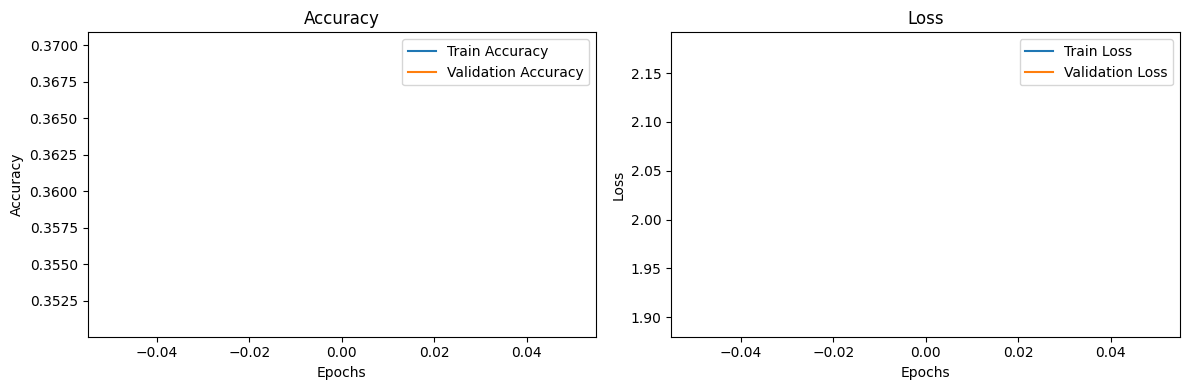

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

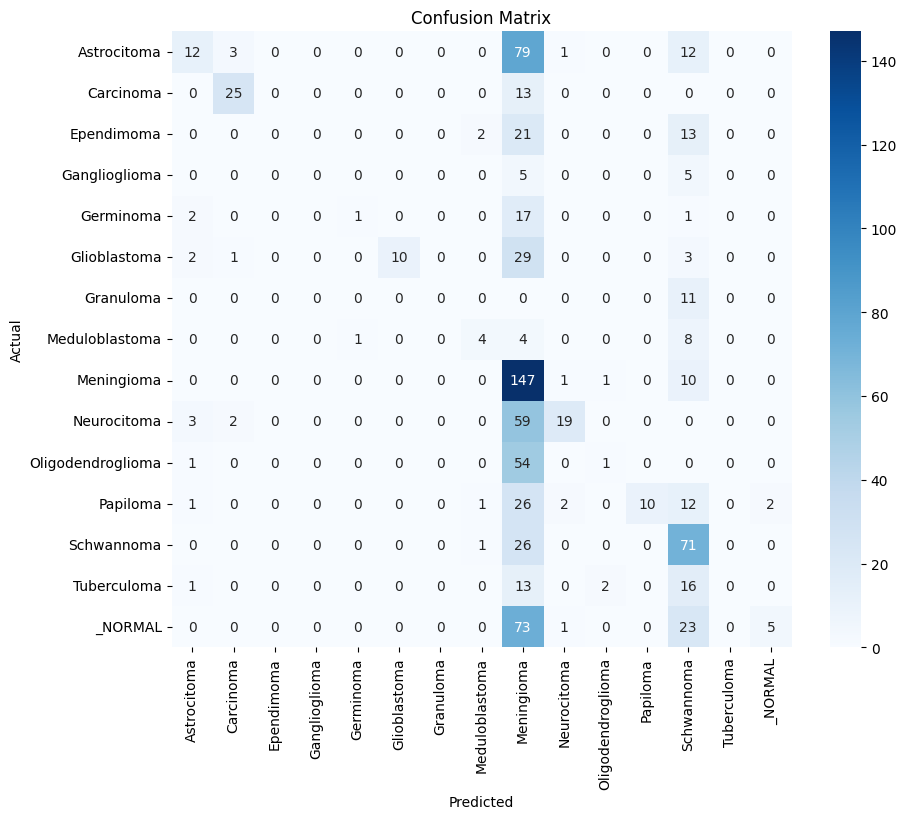

Weighted F1 Score: 0.2788
Classification Report:

                   precision    recall  f1-score   support

      Astrocitoma     0.5455    0.1121    0.1860       107
        Carcinoma     0.8065    0.6579    0.7246        38
       Ependimoma     0.0000    0.0000    0.0000        36
    Ganglioglioma     0.0000    0.0000    0.0000        10
        Germinoma     0.5000    0.0476    0.0870        21
     Glioblastoma     1.0000    0.2222    0.3636        45
        Granuloma     0.0000    0.0000    0.0000        11
   Meduloblastoma     0.5000    0.2353    0.3200        17
       Meningioma     0.2597    0.9245    0.4055       159
      Neurocitoma     0.7917    0.2289    0.3551        83
Oligodendroglioma     0.2500    0.0179    0.0333        56
         Papiloma     1.0000    0.1852    0.3125        54
       Schwannoma     0.3838    0.7245    0.5018        98
      Tuberculoma     0.0000    0.0000    0.0000        32
          _NORMAL     0.7143    0.0490    0.0917       102

    

/Users/matisiekpl/PycharmProjects/guzy/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matisiekpl/PycharmProjects/guzy/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matisiekpl/PycharmProjects/guzy/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [17]:
# Train ML model

train_ds = image_dataset_from_directory(
    merged_data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

val_ds = image_dataset_from_directory(
    merged_data_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

base_model = DenseNet169(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(44, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['sparse_categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

val_labels = []
val_preds = []

for images, labels in val_ds:
    preds = model.predict(images)
    val_labels.extend(labels.numpy())
    val_preds.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(val_labels, val_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(val_labels, val_preds, average='weighted')
print(f'Weighted F1 Score: {f1:.4f}')

class_names = train_ds.class_names
report = classification_report(val_labels, val_preds, target_names=class_names, digits=4)
print("Classification Report:\n")
print(report)

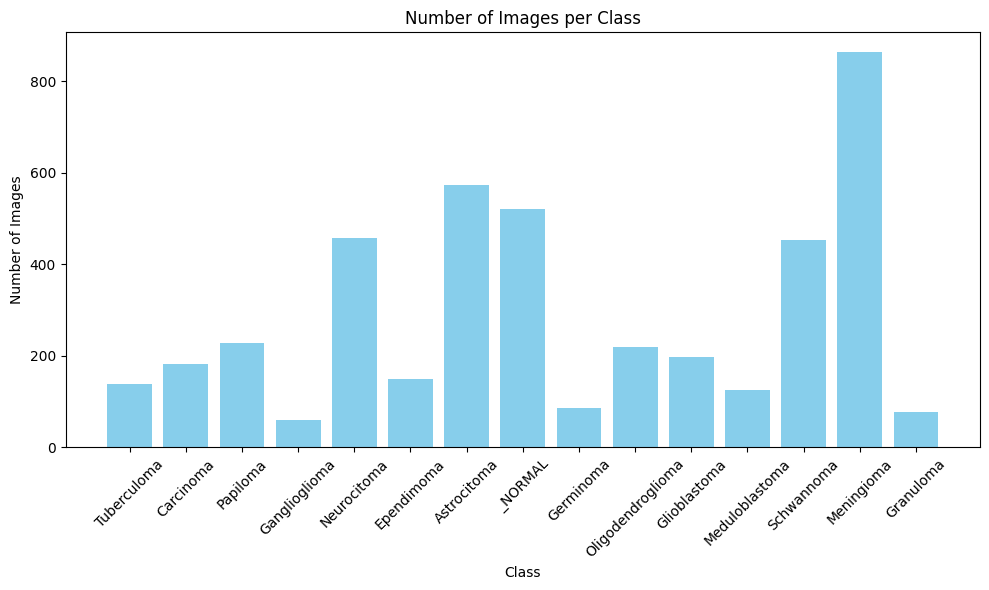

In [18]:

class_counts = {}
for class_name in os.listdir(merged_data_dir):
    class_path = os.path.join(merged_data_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len([name for name in os.listdir(class_path) if name.endswith('.jpeg') or name.endswith('.jpg')])

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
